<h2>Initial Data Inspection

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# CREATE BITS COMPARING THE MOVIES FIRST MUSICALS FIRST, ETC. 

df = pd.read_csv('data/ORIGINAL_musical_movies_10820_mean.csv')

In [22]:
#df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'])
df = df.drop(columns=['BWAY_total_potential_gross', 'BWAY_total_performances', 'BWAY_total_previews'])
#df = df.drop([108,270,68,198,450,471,348])
df = df.drop([433])


In [23]:
df.columns

Index(['Unnamed: 0', 'title', 'FILM_runtime', 'FILM_stars', 'FILM_directors',
       'FILM_aka', 'FILM_oscars_won', 'FILM_genres', 'FILM_budget',
       'FILM_domestic_gross', 'FILM_worldwide_gross', 'FILM_mpaa_rating',
       'FILM_release_date', 'FILM_tconst', 'FILM_primaryTitle',
       'FILM_runtimeMinutes', 'FILM_genres.1', 'BWAY_total_weekly_gross',
       'BWAY_last_performance', 'BWAY_avg_ticket_price', 'BWAY_avg_capacity',
       'BWAY_avg_top_ticket_price', 'BWAY_avg_seats_in_theatre',
       'FILM_release_year', 'FILM_mpaa_rating_number',
       'BWAY_average_weekly_gross', 'FILM_CPI', 'BWAY_CPI', 'FILM_budget_adj',
       'FILM_domestic_gross_adj', 'FILM_worldwide_gross_adj',
       'BWAY_total_weekly_gross_adj', 'BWAY_average_weekly_gross_adj',
       'GENRE_!', 'GENRE_2', 'GENRE_3', 'GENRE_4', 'GENRE_5', 'GENRE_Action',
       'GENRE_Adventure', 'GENRE_Animation', 'GENRE_Biography', 'GENRE_Comedy',
       'GENRE_Crime', 'GENRE_Documentary', 'GENRE_Drama', 'GENRE_Family',


In [16]:
df.corr()

,Unnamed: 0,FILM_runtime,FILM_oscars_won,FILM_budget,FILM_domestic_gross,FILM_worldwide_gross,FILM_mpaa_rating,BWAY_total_weekly_gross,BWAY_avg_ticket_price,BWAY_avg_capacity,...,GENRE_Family,GENRE_Fantasy,GENRE_Horror,GENRE_Music,GENRE_Musical,GENRE_Mystery,GENRE_Romance,GENRE_Sport,GENRE_Thriller,GENRE_War
Unnamed: 0,1.000000,-0.014354,0.010155,-0.052965,0.000037,0.011607,-0.062247,0.005041,-0.020462,-0.011227,...,0.003925,-0.076151,-0.002896,0.029799,-0.045587,0.032498,0.008397,-0.013727,0.038594,0.034528
FILM_runtime,-0.014354,1.000000,0.188581,0.140964,0.140864,0.126852,0.219803,0.188199,0.206493,0.195424,...,0.017892,0.050429,-0.027231,0.049907,0.245051,-0.016552,0.214805,-0.002840,-0.033635,0.092148
FILM_oscars_won,0.010155,0.188581,1.000000,0.099410,0.037119,0.037165,0.182285,0.136439,0.089843,0.158837,...,0.044337,0.017313,0.019862,0.042566,0.140921,0.037893,0.141742,-0.016638,0.038366,0.013517
FILM_budget,-0.052965,0.140964,0.099410,1.000000,0.719529,0.763893,0.196286,0.461760,0.184799,0.156471,...,0.340805,0.191844,-0.015796,0.007341,0.116341,0.015634,0.121124,-0.027225,0.041142,-0.027212
FILM_domestic_gross,0.000037,0.140864,0.037119,0.719529,1.000000,0.940011,0.030876,0.401278,0.145729,0.129216,...,0.335966,0.232313,-0.015257,-0.007238,0.063853,-0.028000,0.093750,0.014331,-0.018316,-0.036405
FILM_worldwide_gross,0.011607,0.126852,0.037165,0.763893,0.940011,1.000000,0.082799,0.438329,0.145062,0.143540,...,0.302144,0.203578,-0.021816,-0.007538,0.076689,-0.025602,0.101732,-0.005967,-0.026471,-0.032223
FILM_mpaa_rating,-0.062247,0.219803,0.182285,0.196286,0.030876,0.082799,1.000000,0.167551,0.220487,0.147365,...,0.049993,0.091184,0.070430,0.072541,0.080313,0.044327,0.162444,0.020413,0.116650,-0.009907
BWAY_total_weekly_gross,0.005041,0.188199,0.136439,0.461760,0.401278,0.438329,0.167551,1.000000,0.298986,0.238580,...,0.202236,0.081176,-0.020109,0.026538,0.270125,-0.017535,0.085266,0.017996,0.058381,-0.021996
BWAY_avg_ticket_price,-0.020462,0.206493,0.089843,0.184799,0.145729,0.145062,0.220487,0.298986,1.000000,0.480320,...,0.128167,0.141180,-0.017283,0.007581,0.185266,0.008018,0.130925,0.043591,-0.003898,0.063230
BWAY_avg_capacity,-0.011227,0.195424,0.158837,0.156471,0.129216,0.143540,0.147365,0.238580,0.480320,1.000000,...,0.079799,0.123512,0.003378,0.003610,0.149372,0.000954,0.098943,0.012498,-0.005596,-0.041969


<h3> Our best correlated value is domestic gross of a film to the total gross of a Broadway show:

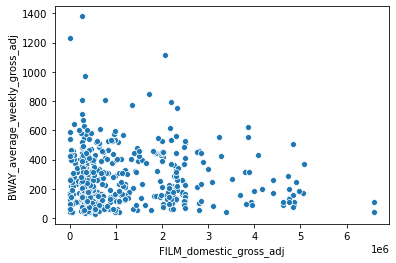

In [17]:
# Check against amount adjusted for 

sns.scatterplot(data=df, x='FILM_domestic_gross_adj', y='BWAY_average_weekly_gross_adj')

<h3> Worldwide gross is similarly correlated:

<h4> Broadway Gross to Domestic (without adjustment)

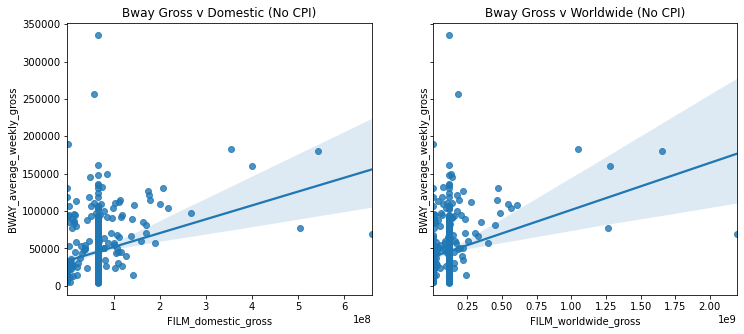

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2, sharey=True)
ax1.set_title('Bway Gross v Domestic (No CPI)')
ax2.set_title('Bway Gross v Worldwide (No CPI)')
#ax1.set_axis_labels('Domestic Gross (in 100 mil)', 'Bway Total Gross (in bil)')
#ax2.set_axis_labels('Worldwide Gross (in 100 mil)', 'Bway Total Gross (in bil)')
sns.regplot(data = df, x='FILM_domestic_gross', y='BWAY_average_weekly_gross', ax=ax1)
sns.regplot(data = df, x='FILM_worldwide_gross', y='BWAY_average_weekly_gross', ax=ax2);



<h4> Broadway Gross to Domestic (with CPI adjustment)

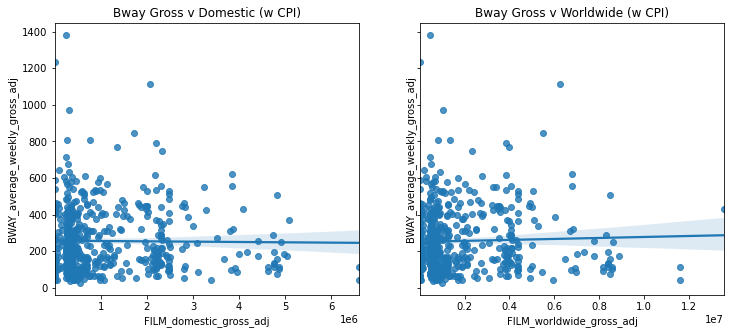

In [19]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2, sharey=True)
ax1.set_title('Bway Gross v Domestic (w CPI)')
ax2.set_title('Bway Gross v Worldwide (w CPI)')
#ax1.set_axis_labels('Domestic Gross (in 100 mil)', 'Bway Total Gross (in bil)')
#ax2.set_axis_labels('Worldwide Gross (in 100 mil)', 'Bway Total Gross (in bil)')
sns.regplot(data = df, x='FILM_domestic_gross_adj', y='BWAY_average_weekly_gross_adj', ax=ax1)
sns.regplot(data = df, x='FILM_worldwide_gross_adj', y='BWAY_average_weekly_gross_adj', ax=ax2);



<h3> The below shows that the relationship between film domestic gross and Broadway total gross is best applied to movies that are rated PG (graph 3).

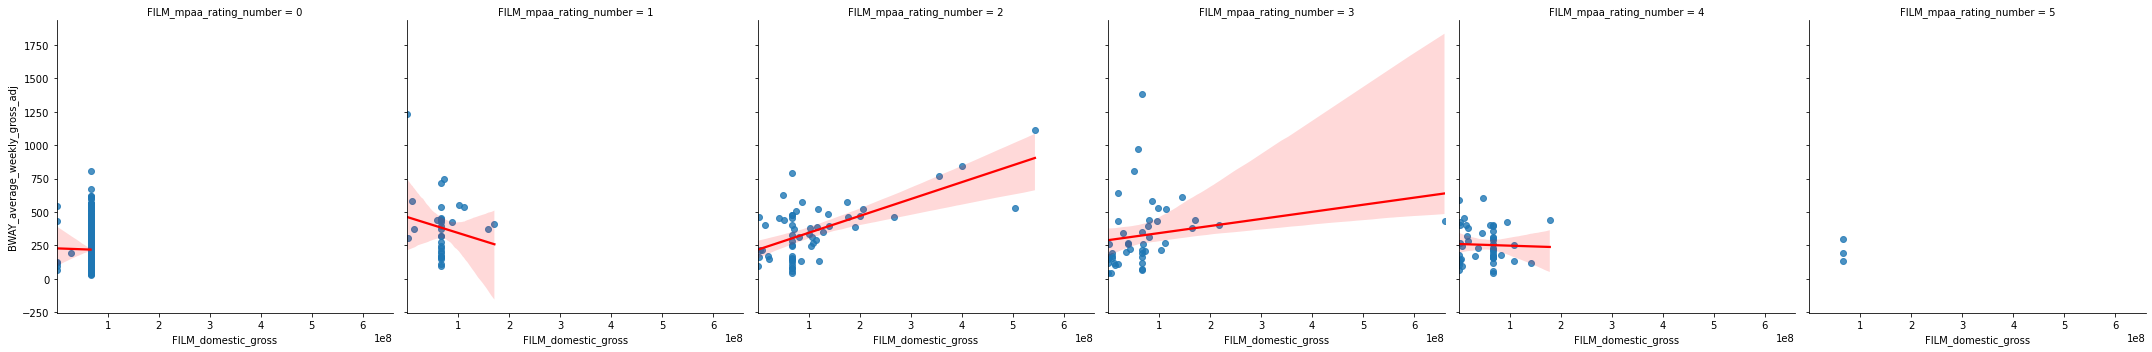

In [11]:
sns.lmplot(x='FILM_domestic_gross', y='BWAY_average_weekly_gross_adj', col='FILM_mpaa_rating_number', data=df,
          line_kws={'color': 'red'});

<h4> INCLUDE INFORMATION ABOUT GENRE BREAKDOWN TOO

<br>

<h2>BROADWAY TO FILM (do not run this section)

<h3>R^2 score started at .08, but through feature transformation and cleaning, the following results were found for a linear model

In [21]:
X = df[['BWAY_average_weekly_gross_adj', 'BWAY_total_performances',
       'BWAY_total_previews', 'BWAY_avg_ticket_price',
       'BWAY_avg_capacity', 'BWAY_avg_top_ticket_price',
       'BWAY_avg_seats_in_theatre']]

In [22]:
y = df['FILM_domestic_gross_adj']

In [ ]:
lr = LinearRegression()
lr.fit(X,y)

In [33]:
lr.score(X,y)

0.30232213545934805

<h3>That score is low, and doesn't improve much with polynomial features...

In [35]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.407240382274243

<br>

<h3> When using film success as a predictor for the stage version...

<h2>FILM TO BROADWAY

In [24]:
# Setting features from FILM data to target for BWAY data

X = df[['FILM_budget_adj', 'FILM_oscars_won', 'FILM_domestic_gross_adj', 'FILM_worldwide_gross_adj',
          'FILM_mpaa_rating_number', 'FILM_runtime', 'GENRE_Action', 'GENRE_Adventure', 'GENRE_Animation', 
        'GENRE_Biography', 'GENRE_Comedy', 'GENRE_Crime', 'GENRE_Documentary', 'GENRE_Drama',
        'GENRE_Family', 'GENRE_Fantasy', 'GENRE_Horror', 'GENRE_Music', 'GENRE_Musical', 'GENRE_Mystery', 
        'GENRE_Romance', 'GENRE_Sport', 'GENRE_Thriller', 'GENRE_War', 'GENRE_Western']]
y = df['BWAY_average_weekly_gross']



In [43]:
# Create test_train_split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=29)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3498606170475562

In [27]:
# StatsModel investgation

model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     BWAY_average_weekly_gross   R-squared:                       0.259
Model:                                   OLS   Adj. R-squared:                  0.223
Method:                        Least Squares   F-statistic:                     7.274
Date:                       Thu, 08 Oct 2020   Prob (F-statistic):           1.58e-21
Time:                               22:40:19   Log-Likelihood:                -6427.7
No. Observations:                        547   AIC:                         1.291e+04
Df Residuals:                            521   BIC:                         1.302e+04
Df Model:                                 25                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.638e+04   6249.721      2.621      0.009    4099.654    2.87e+04
FILM_budget_adj              0.0085      0.008      1.062      0.289      -0.007       0.024
FILM_oscars_won            910.5717   1295.751      0.703      0.483   -1634.968    3456.111
FILM_domestic_gross_adj     -0.0091      0.003     -2.884      0.004      -0.015      -0.003
FILM_worldwide_gross_adj     0.0030      0.002      1.745      0.082      -0.000       0.006
FILM_mpaa_rating_number   3129.2382   1064.346      2.940      0.003    1038.302    5220.175
FILM_runtime               221.0850     60.002      3.685      0.000     103.209     338.961
GENRE_Action             -1.436e+04   9546.556     -1.504      0.133   -3.31e+04    4398.664
GENRE_Adventure           2.962e+04   8817.196      3.359      0.001    1.23e+04    4.69e+04
GENRE_Animation            781.7359   1.13e+04      0.069      0.945   -2.15e+04    2.31e+04
GENRE_Biography           1.875e+04   6890.637      2.721      0.007    5211.404    3.23e+04
GENRE_Comedy               438.1327   3580.398      0.122      0.903   -6595.658    7471.923
GENRE_Crime               1.614e+04   7887.253      2.046      0.041     643.105    3.16e+04
GENRE_Documentary        -2.122e+04   1.62e+04     -1.310      0.191    -5.3e+04    1.06e+04
GENRE_Drama              -6706.2735   3305.584     -2.029      0.043   -1.32e+04    -212.363
GENRE_Family              1.359e+04   6710.576      2.025      0.043     406.666    2.68e+04
GENRE_Fantasy             1.808e+04   6535.221      2.767      0.006    5242.032    3.09e+04
GENRE_Horror              3272.2183   1.13e+04      0.289      0.773    -1.9e+04    2.55e+04
GENRE_Music                789.8240   7975.763      0.099      0.921   -1.49e+04    1.65e+04
GENRE_Musical             1.748e+04   4347.492      4.020      0.000    8936.298     2.6e+04
GENRE_Mystery             4231.7087   9552.750      0.443      0.658   -1.45e+04     2.3e+04
GENRE_Romance             4160.4496   3858.631      1.078      0.281   -3419.939    1.17e+04
GENRE_Sport                2.03e+04   1.45e+04      1.402      0.162   -8150.900    4.87e+04
GENRE_Thriller           -1565.8470   8040.383     -0.195      0.846   -1.74e+04    1.42e+04
GENRE_War                 1.139e+04   8205.940      1.388      0.166   -4730.541    2.75e+04
GENRE_Western              166.3373   1.65e+04      0.010      0.992   -3.22e+04    3.25e+04
==============================================================================
Omnibus:                      278.704   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2591.301
Skew:                           2.037   Prob(JB):                       

In [28]:
# Reset model to linear regression 
model = lr

In [486]:
df.loc[242]

title                                                             King Charles III
FILM_runtime                                                                    88
FILM_stars                       ['Tim Pigott-Smith', 'Oliver Chris', 'Richard ...
FILM_directors                                                    ['Rupert Goold']
FILM_aka                                                          King Charles III
FILM_oscars_won                                                                  0
FILM_genres                                                    ['Drama', 'Sci-Fi']
FILM_budget                                                            1.52977e+07
FILM_domestic_gross                                                    3.36922e+07
FILM_worldwide_gross                                                   6.05463e+07
FILM_mpaa_rating                                                                 0
FILM_release_date                                                       2017-05-14
FILM

In [29]:
res = model.predict(X_test) - y_test
res.sort_values().head(10)

450   -65529.146574
134   -59095.489157
156   -57763.614934
34    -53922.183167
395   -52365.781043
36    -50612.381471
242   -48557.796975
248   -45345.724760
166   -40340.105936
294   -35799.543435
Name: BWAY_average_weekly_gross, dtype: float64

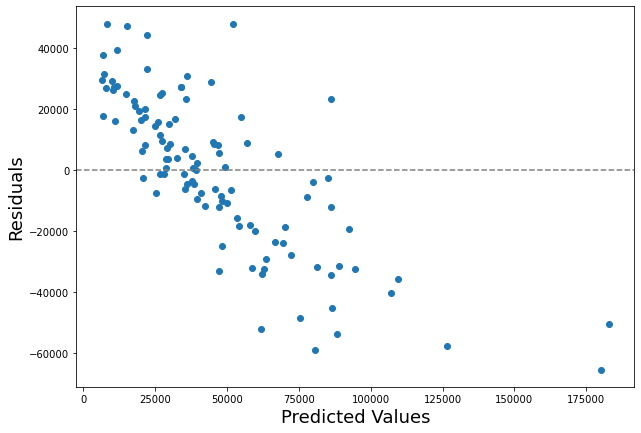

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

<h4> The r^2 score is slightly higher, but the residuals are lumped into one area. This seems to imply interaction between the variables, or or the need for polynomial regression.


<h3>Polynomial Regression


    
<h4>Polynomial regression produced the best R^2 - .879

In [31]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr = LinearRegression()
lr.fit(X_poly, y)
lr.score(X_poly, y)

0.6040202763090414

<h4>But polynomial regression with the test set performed very poorly, with R^2 = -1.128

In [32]:
p = PolynomialFeatures()
X_train_poly = p.fit_transform(X_train)

lr = LinearRegression()

s = StandardScaler(with_mean=False)

X_train_poly_scaled = s.fit_transform(X_train_poly)
lr.fit(X_train_poly, y_train)
lr.score(X_train_poly_scaled,y_train)

-137.6452131466654

<h3>LassoCV

<h4>Test of model with LassoCV (scroll down) - R^2 = .608

In [65]:
from sklearn.linear_model import LassoCV

m = LassoCV()
p = PolynomialFeatures(degree=2)

X_train_poly = p.fit_transform(X_train)

s = StandardScaler(with_mean=False)

X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68088229.05630493, tolerance: 48466418.068904646
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67285622.56280518, tolerance: 48466418.068904646
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162557662.3866272, tolerance: 48466418.068904646
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294367702.9897919, tolerance: 46917175.975673124
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484617780.43937683, tolerance: 46917175.975673124
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1532499301.9829407, tolerance: 46917175.975673124
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100163632.86706543, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154060454.36401367, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60033351.029174805, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61067736.209228516, tolerance: 48412613.670718126
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48862433.51184082, tolerance: 48412613.670718126
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94490547.16049194, tolerance: 48412613.670718126
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

0.33102228395068467

<h4> Test of Test set with LassoCV (scroll down) - R^2 = 0.271

In [66]:
m = LassoCV()
p = PolynomialFeatures(degree=2)

X_test_poly = p.fit_transform(X_test)

s = StandardScaler(with_mean=False)

X_test_poly_scaled = s.fit_transform(X_test_poly)
model = m.fit(X_train_poly_scaled,y_train)
model.score(X_test_poly_scaled,y_test)

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68088229.05630493, tolerance: 48466418.068904646
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67285622.56280518, tolerance: 48466418.068904646
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162557662.3866272, tolerance: 48466418.068904646
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484617780.43937683, tolerance: 46917175.975673124
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1532499301.9829407, tolerance: 46917175.975673124
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3284232845.7400208, tolerance: 46917175.975673124
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100163632.86706543, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154060454.36401367, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60033351.029174805, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5781837532.794098, tolerance: 43887040.246370494
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61067736.209228516, tolerance: 48412613.670718126
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48862433.51184082, tolerance: 48412613.670718126
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15110742208.616684, tolerance: 48412613.670718126
  model = cd_fast.enet_coordinate_descent(


0.40903113576758277

<h3>Ridge CV

<h4>Test of Model w RidgeCV - R^2 = .901

In [58]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

m = RidgeCV()
p = PolynomialFeatures(degree=2)

#X_train_poly = p.fit_transform(X_train)

s = StandardScaler(with_mean=False)

X_train_scaled = s.fit_transform(X_train)
m.fit(X_train_scaled,y_train)
m.score(X_train_scaled,y_train)

0.23315292914769692

<h4>Test of test data w RidgeCV - R^2 = -.286

In [62]:
m = RidgeCV()
p = PolynomialFeatures(degree=2)

X_test_poly = p.fit_transform(X_test)

s = StandardScaler(with_mean=False)

X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.fit_transform(X_test)
m.fit(X_train_scaled,y_train)
m.score(X_test_scaled,y_test)

0.34694573184164745

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [57]:
X_train_poly.shape

(437, 351)

In [75]:
m.predict(X_test_poly).reshape(-1,1)

array([[ 2.30091841e+05],
       [ 2.35656995e+05],
       [ 4.54505271e+07],
       [ 2.80178228e+05],
       [ 2.00411019e+05],
       [ 2.23962934e+05],
       [ 1.80615399e+08],
       [ 1.13886871e+05],
       [ 2.17106481e+05],
       [ 1.97364182e+05],
       [ 2.35656995e+05],
       [ 2.25583006e+05],
       [ 2.15251430e+05],
       [ 1.97364182e+05],
       [ 1.87952932e+08],
       [ 1.85381576e+09],
       [ 5.29421305e+05],
       [ 1.31086663e+06],
       [ 1.85570608e+05],
       [ 2.23962934e+05],
       [ 2.00887791e+09],
       [ 2.23962934e+05],
       [ 5.77506933e+08],
       [ 7.36667480e+07],
       [ 4.57378644e+05],
       [ 5.64071047e+08],
       [ 2.37528062e+08],
       [ 2.23962934e+05],
       [ 2.32639183e+06],
       [ 2.23962934e+05],
       [ 2.23962934e+05],
       [ 2.23962934e+05],
       [ 1.94845865e+05],
       [ 4.69997458e+07],
       [ 2.23962934e+05],
       [ 2.83869367e+08],
       [ 2.00411019e+05],
       [ 2.39367098e+05],
       [ 1.9

In [76]:
y_test_poly = p.fit_transform(y_test)

res = m.predict(X_test_poly) - y_test_poly
res.sort_values().head(10)

ValueError: Expected 2D array, got 1D array instead:
array=[ 47248.28431227  17479.0625     106912.5         51446.42465753
  80609.00854701  39172.97903226  79897.90522876  47133.65878378
  19518.41463415  58729.63821138   6843.67857143  72370.31914894
  10685.56557377  26779.40217391  54890.72425532  86210.53977695
  44437.85964912   8281.38709677  28804.39506173  47809.59375
  47167.27826087  11797.76       126662.76027397  88849.56031128
  33915.15384615  85169.54545455  94615.13140097  17103.26436782
  27269.13043478  62024.68519637   7218.42222222  10355.4875
  75535.24076923  36080.56637168  35408.06407035  35346.9476489
  29211.78947368  86558.00416667   7962.35483871  27223.5014218
 182940.53846092  29484.53246753  21472.83333333  22274.68711656
  26564.15789474  24901.15037594  81244.63314711  30278.58947368
  21355.52631579  29770.3125      86236.69278997  11535.79268293
  63376.828125    39472.51515152  36227.96621622  28819.0212766
  48166.54326923  37668.71354167  32033.05        52058.20740741
  56785.76018957 109426.9842524   20137.57142857   6413.25714286
  17903.65458937  86025.65128205  32715.74545455  48395.97888889
  37793.02946397  38377.77981651  27911.9047619   26035.35849057
  39572.33571429  35074.69354839 180079.58618654  66538.59567388
  58148.64522417  25284.06532663  45274.3317757   88165.99256111
  67642.73337903  49302.71171171  26576.88118812  20910.83233533
  38195.66666667  45868.78571429  61892.2992126   42198.25862069
  50069.20512821  20488.71428571  21367.01176471  22210.74506579
   6789.72413793  14984.5         70098.20485102  54294.19905213
   9889.19620253  34131.4301676   77789.00759536  35837.34977578
  46743.05377358  59553.92241379  69454.5470297   92402.04755784
  45287.8         53574.77987421  62758.82408805  15096.109375
  11048.91304348  41029.82954545].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [66]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train.values)

#set up the 3 models we're choosing from:

lr = LinearRegression()

'''

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1)

'''

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures() 

X_train_poly = poly.fit_transform(X_train_val.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [67]:
lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_test, y_test):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_val_poly, y_val)
print(f'Degree 2 polynomial regression val R^2: {lr_poly.score(X_test_poly, y_test):.3f}')

Linear Regression val R^2: 0.102
Ridge Regression val R^2: -0.247
Degree 2 polynomial regression val R^2: -8.178


<h3> I then applied LASSO regression (due to the limited amount of features, this seemed a better fit than Ridge)

In [37]:
lasso_model = Lasso(alpha = 100) 
lasso_model.fit(X_train.loc[:,columns_list], y_train)

NameError: name 'columns_list' is not defined

In [200]:
list(zip(columns_list,lasso_model.coef_))

[('FILM_budget', -0.34052384852875406),
 ('FILM_oscars_won', 11868907.6267567),
 ('FILM_domestic_gross', -0.6409569203034343),
 ('FILM_worldwide_gross', 0.8294437864102749),
 ('FILM_mpaa_rating_number', 3874079.859233243),
 ('FILM_runtime', 108932.762993186)]

<h3> To achieve more scaled variables, I fit a StandardScaler to the model, and applied a new LASSO regression

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [39]:
# Applied scaler to train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

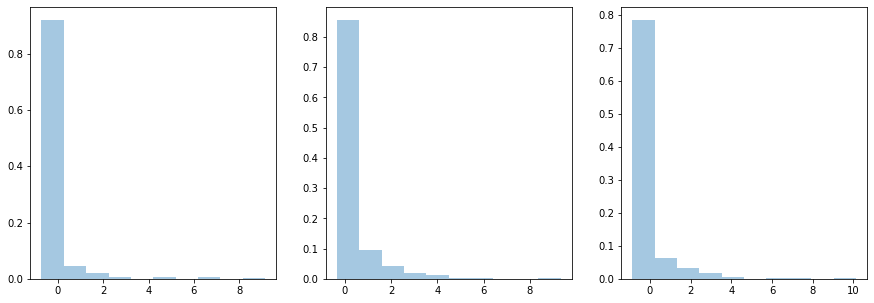

In [40]:
# Use visualization to view transformed variables - large left skew towards zero on all accounts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(X_tr[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)

In [41]:
lasso_model = Lasso(alpha = 100)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=100)

In [213]:
list(zip(X_train.columns, lasso_model.coef_))

[('FILM_budget', -8955727.4806042),
 ('FILM_oscars_won', 11023480.888531774),
 ('FILM_domestic_gross', -31682956.64248365),
 ('FILM_worldwide_gross', 112323397.4202749),
 ('FILM_mpaa_rating_number', 5419342.572314452),
 ('FILM_runtime', 3296342.868624636)]

In [42]:
test_set_pred = lasso_model.predict(X_test)

In [43]:
r2_score(y_test, test_set_pred)

-1.4973028229047228e+16

<h3> Even with the standardized coeffecients, the r^2 score with LASSO is not good.

<h2>Appendix-ish

In [235]:
#set up the 3 models we're choosing from:

lr = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [239]:
lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_val, y_val):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: -0.805
Ridge Regression val R^2: -0.768
Degree 2 polynomial regression val R^2: -5.146


In [220]:
# Set up plot for how errors changes as alpha changes 

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,columns_list].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,columns_list].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

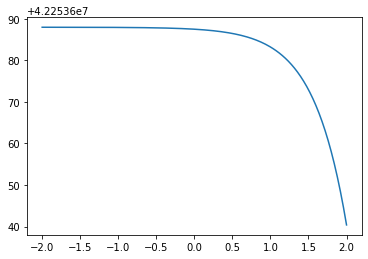

In [221]:
# Curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

<h4> Note: I did try feature transformation and created a value "BWAY_relative_gross", which was essentially actual gross / divided by potential gross
    

In [77]:
# Sets all infinity values to the mean of the non-infinity values for BWAY_relative_gross

non_infinity_mean = df[df['BWAY_relative_gross'] != np.inf]['BWAY_relative_gross'].mean()

df.loc[df.BWAY_relative_gross == np.inf, 'BWAY_relative_gross'] = non_infinity_mean

In [95]:
newX = df[['FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating_number', 'FILM_runtime']]
newy = df['BWAY_relative_gross']

In [96]:
lr.fit(newX, newy)
lr.score(newX, newy)

0.02003801090133772

In [97]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(newX)

lr_full = LinearRegression()
lr_full.fit(X_poly, newy)
lr_full.score(X_poly, newy)

0.029795610152947405

<h4> This did not work so well, so I stuck with actual gross of each stage production.

In [243]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [244]:
lr.fit(x_train, y_train)

LinearRegression()

In [245]:
lr.score(x_train, y_train)

0.11533351656294266